# Procesamiento Digital de Imágenes - Examen Final

## Instrucciones

1.	El examen consta de 1 pregunta y tendrá 1 semana para resolverla con su equipo del trabajo final (en caso de sobrar uno o dos alumnos pueden crearse, máximo dos equipos de 2 integrantes).
2.	El trabajo será entregado, en el aula virtual, hasta las 7:59:59 am del viernes 8 de diciembre. En seguida habrá una exposición, máximo 10 minutos por grupo, de los grupos de trabajo de 8 a 10 am. **BAJO NINGUN MOTIVO SE ACEPTARAN EXAMENES FUERA DEL LIMITE DE TIEMPO INDICADO**
3.	El examen cuenta con un docente académico, el cual estará conectado durante los primeros 20 minutos del examen.
4.	Las dudas conceptuales sobre el examen han de presentarse dentro de los primeros 20 minutos mediante un correo al profesor GONZALEZ VALENZUELA, RICARDO EUGENIO a pcsirgon@upc.edu.pe.
5.	Los inconvenientes técnicos pueden presentarse a pasado los primeros 20 minutos, puede comunicarlo al profesor GONZALEZ VALENZUELA, RICARDO EUGENIO a pcsirgon@upc.edu.pe.
6.	El profesor en mención solo recibirá correos provenientes de las cuentas UPC, de ninguna manera se recibirán correos de cuentas públicas. 
7.	Ante problemas técnicos, debe de forma obligatoria adjuntar evidencias del mismo, como capturas de pantalla, videos, fotos, etc. Siendo requisito fundamental que, en cada evidencia se pueda apreciar claramente la fecha y hora del sistema operativo del computador donde el alumno está rindiendo el examen. 
8.	Los correos sobre problemas técnicos se recibirán hasta 15 minutos luego de culminado el examen.


## Integrantes

*   Alumno 1: <font color='green'> u20181a010 - Joaquin Adrian Galvan Diaz</font><br>
*   Alumno 2: <font color='green'> u201818067 - Dante Brandon Moreno Carhuacusma</font><br>

## Caso de Estudio - Video Summarization

1. Descargar y/o crear videos de 10 a 15 minutos y efectuar un resumen de tiempo en los mismos.

2. Aplicando únicamente técnicas de procesamiento digital de imágenes, segmentar los objetos que aparecen en diferentes instantes y sobreponerlos en una cantidad muy inferior de frames etiquetando cada objeto con los insantes de tiempo en que aparece en el video.

3. En el siguiente [video](https://www.youtube.com/watch?v=gk3qTMlcadk), podrá tener un mejor concepto de lo solicitado. 

4.	Documente sus métodos y elecciones. Explique su metodología. Codifique su solución. Obtenga resultados y realice comparaciones. Redacte sus conclusiones.


## Resolución

### Metodología (6 puntos)

<font color='green'>Aquí **enumere** y **explique** los pasos de su metodología </font>

#### Primer método: Diferencia de imágenes y ROIs

En nuestro primer método, asumimos que el primer frame del video está "limpio", es decir, es la base sobre la cual detectar los nuevos objetos en la imagen. Definimos entonces:

 * $A$: Primer frame del video.
 * $B_{n}$: n-ésimo frame del video.

La primera tarea es identificar regiones de interés (ROIs) donde ocurran cambios en el video. Luego se podrá utilizar esta información para calcular juntar los objetos en el resumen. El algoritmo de es:

1. Por cada $B_{n}$:
> $ROIs$: Arreglo que guardará las regiones de interés en el frame.
> - 1.1. Hallar la diferencia: $D_{n}$ = $A$ - $B_{n}$. **Si** $B_{n}$ es similar a $A$, $D_{n}$ estará compuesto en su mayoría por $0s$.
> - 1.2. Aplicar filtro de la media o mediana sobre $D_{n}$, ya que puede ser afectado por el rudio
> - 1.3. Binarizar o Aplicar un operador clásico de Edge Detection sobre $D_{n}$
> - 1.4. $contornos \leftarrow findContours(D_{n})$
> - 1.5. Por cada $c$ en $contornos$:
>> * Agregar rectángulo envolvente de $c$ al arreglo $ROIs$

El arreglo $ROIs$ guarda las regiones de interés en un frame detectadas. Para la selección, queremos guardar un identificador del objeto para los diferentes frames. Además, se debe guardar el momento en el tiempo en el que aparece una región de interés. Entonces, definimos "Objeto" en el video, donde cada "Objeto" aparece en distintas ROIs en cada frame del video.

### Implementación (6 puntos)

In [1]:
!pip install pafy
!pip install youtube-dl

In [1]:
import cv2
import numpy as np
import pandas as pd
import pafy
import matplotlib.pyplot as plt

#### Cargar el vídeo

In [2]:
def cv2_imshow(imagen, titulo = "Imagen"):
    cv2.imshow(titulo,imagen)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
url = "https://www.youtube.com/watch?v=CkVJyAKwByw"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

## Reproducir el video

In [68]:
Frame_Prueba_0 = None
Frame_Prueba_X = None

In [105]:
capture = cv2.VideoCapture()
capture.open(best.url)

j = 0

anterior = None
start = True

while (capture.isOpened()):
    ##Por cada frame del video:
    #capturar y mostrar el frame
    ret, frame = capture.read()
    #cv2.imshow("It's meta",frame)
    frame = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
    
    if j == 0:
        Frame_Prueba_0 = frame
    elif j == 180:
        Frame_Prueba_X = frame
    
    if not start:        
        dif = anterior - frame
        dif = cv2.adaptiveThreshold(frame,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,0)
        cv2.imshow("Diferencia",dif)
    else:
        start = False    
    anterior = frame
    
    j += 1
    
    if(cv2.waitKey(20) & 0xFF == ord('q')):
        anterior = dif
        break
capture.release()
cv2.destroyAllWindows()

cv2.imshow("Diferencia",anterior)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Pruebas Dante

In [5]:
anterior.shape

(720, 1280)

In [6]:
def graficarRectDeROIs(imagen, ROIs):
    for roi in ROIs:
        (x,y,w,h) = roi
        cv2.rectangle(imagen, (x,y), (x+w,y+h), (255,0,0), 2)

Capturar los primeros "N" frames para poder testear.
Se baja la resolución para evitar carga

In [7]:
N_Prueba = 240 #Cantidad de frames de prueba

In [8]:
nH = int(anterior.shape[0] // 1.5)
nW = int(anterior.shape[1] // 1.5)
print(nH,nW)

480 853


Funciones adicionales para ayudar:

In [11]:
def areaInterseccion(roi1, roi2):
    def dEje(tuplaS): #tuplaS: [ (x1, x1 + w1) , (x2, x2 + w2) ]
        def auxResta(v1, v2): #.... Devuelve la resta, si es negativo, devuelve 0
            d = v1 - v2
            if d < 0:
                return 0
            return d
        im = 0 #id del segmento más cerca a 0
        iM = 1 #id del segmento más lejos de 0
        if tuplaS[1][0] < tuplaS[0][0]:
            im = 1
            iM = 0
        return (tuplaS[im][1] - tuplaS[iM][0]) - auxResta(tuplaS[im][1], tuplaS[iM][1])
    (x1, y1, w1, h1) = roi1
    (x2, y2, w2, h2) = roi2
    if x1 < x2 + w2 and x1 + w1 > x2 and y1 < y2 + h2 and y1 + h1 > y2: # Si colisionan
        dx = dEje([(x1, x1+w1), (x2, x2+w2)])
        dy = dEje([(y1, y1+h1), (y2, y2+h2)])
        return dx * dy
    return 0
def roiUroi(roi1, roi2):
    nXmin = min(roi1[0],roi2[0])
    nXmax = max(roi1[0] + roi1[2],roi2[0] + roi2[2])
    nYmin = min(roi1[1],roi2[1])
    nYmax = max(roi1[1] + roi1[3],roi2[1] + roi2[3])
    return (nXmin, nYmin, nXmax - nXmin, nYmax - nYmin)

In [30]:
areaInterseccion((0,0,3,3),(0,0,4,4))

Colisionan


9

In [ ]:
## =========================== LEER ========================
# Se está agregando un limitador para no tener "rois" muy pequeñas

In [114]:
# Retorna un arreglos de ROIs de un frame n, comparando con el frame 0
def roisDeFrame(f0, fn, dimKernelBlur, umbralDif): # BTW: dimKernelBlur debe ser impar
    if len(f0.shape) > 2:
        f0 = cv2.cvtColor(f0,cv2.COLOR_RGB2GRAY)
    if len(fn.shape) > 2:
        fn = cv2.cvtColor(fn,cv2.COLOR_RGB2GRAY)
    f0 = np.array(f0, dtype=np.int16) #..... Permitir los valores negativos en la resta inicial :)
    fn = np.array(fn, dtype=np.int16) #..... ""
    D = np.array(np.abs(f0 - fn), dtype=np.uint8)
    D = cv2.medianBlur(D,dimKernelBlur)
    _, D = cv2.threshold(D,umbralDif,255,cv2.THRESH_BINARY)
    contornos, _ = cv2.findContours(D,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    ROIs = []
    for contorno in contornos:
        x,y,w,h = cv2.boundingRect(contorno)
        ROIs.append((x,y,w,h))
    return ROIs

Pruebas con dos frames del video

In [115]:
cv2_imshow(Frame_Prueba_0)
cv2_imshow(Frame_Prueba_X)

In [116]:
auxRois = roisDeFrame(Frame_Prueba_0, Frame_Prueba_X,13,110)
print(len(auxRois))

5


Trabajamos con un DataFrame de Objetos:
>ID | ROI | Frame | Segundo
>--- | --- | --- | ---
>0 | (x, y, w, h) | $f_{0}$ | $t_{0}$
>0 | (x, y, w, h) | $f_{1}$ | $t_{0}$
>0 | (x, y, w, h) | $f_{2}$ | $t_{1}$
>1 | (x, y, w, h) | $f_{1}$ | $t_{0}$

In [99]:
def asignarObjetos(objetos, rois_t, t_frame, mseg, umbralRatioAr):
    # Comparamos los rois en un frame 't'con los rois asignados a objetos en el frame previo (cuando lo llaman debe validar eso)
    # (Asume que debe haber continuidad, si un objeto sale de la pantalla y regresa, lo toma como otro)
    # Utiliza un umbral de intersección para decidir si dos rois son del mismo objeto en diferentes frames
    # RETORNA: arreglo de filas a agregar al DataFrame, con su ID de objeto, ROI, frame y segundo
    agregados = []
    for i in range(len(objetos)): #........ Por cada uno de los objetos en el frame t
        objeto = objetos.iloc[i]
        roi = objeto["ROI"] #................. Compararemos su roi
        for roi_t in rois_t: #................ con cada roi detectado en el nuevo frame
            areaI = areaInterseccion(roi, roi_t) 
            if areaI / (roi[2] * roi[3]) > umbralRatioAr and areaI / (roi_t[2] * roi_t[3]) > umbralRatioAr: # Si el área de la intersección supera el umbral en ambos
                agregados.append([objeto["ID"], roi_t, t_frame, mseg]) #.... Agrega a un arreglo de "filas a agregar" al DataFrame objetos
                rois_t.remove(roi_t) #...................................... Ya no tiene que analizar roi_t porque ya se le asignó id objeto
    # -------- Pueden haber sobrado rois en rois_t, así que asumimos son nuevos objetos ---------------
    n_ID = 0
    if len(objetos) > 0:
        n_ID = max(objetos["ID"]) + 1 #.................. Empezar a enumerar a los objetos desde n_ID
    for roi_t in rois_t:
        agregados.append([n_ID, roi_t, t_frame, mseg])
        n_ID += 1
    return agregados

In [100]:
def limpiarDF(dfObjetos):
    idsObjetos = pd.unique(dfObjetos["ID"])
    for i in idsObjetos:
        aux = dfObjetos[dfObjetos["ID"] == i]
        if len(aux) < 30 and len(aux) > 0:
            aux = dfObjetos.index[dfObjetos["ID"] == i].tolist()
            dfObjetos = objetos.drop(aux)
    return dfObjetos

**Realización:**

In [140]:
# " *Vxp " significa "Experimentar con los valores"
capture.open(best.url)
_, A = capture.read() #.......... Frame "Original", se asume que en este no hay "objetos" en pantalla
A = cv2.cvtColor(A,cv2.COLOR_RGB2GRAY)
nH = int(A.shape[0] // 1.5)
nW = int(A.shape[1] // 1.5)
objetos = [] #................... Arreglo que se espera sea: [ [ [(x,y,w,h), frame, milisegundo], 
#................................                                [(x,y,w,h), frame, milisegundo],...] , [ [roi, frame, t], ... ]
A = cv2.resize(A, (nW,nH)) #................ Baja la resolución del frame
for i in range(N_Prueba): #................. No ocupa todo el video, por ahora solo frames de prueba
    #print("============== FRAME %s =============="%i)
    _, b = capture.read()
    ms = capture.get(0) # Get los milisegundos
    ms = round( ms/1000 ,2)
    b = cv2.cvtColor(b,cv2.COLOR_RGB2GRAY)
    b = cv2.resize(b, (nW,nH))
    rois = roisDeFrame(A, b, 15, 125) # * Vxp, la dimensión del kernel debe ser impar
    #print(">> len(objetos): ", len(objetos))
    #print(">> ROIs crudos: ",len(rois))
    #---- Pasar solo los objetos que aparecieron en el frame (i-1):
    objetos_previos = []
    if i > 0 and len(objetos) > 0:
        objetos_previos = objetos[objetos["Frame"] == i - 1]
    nuevasFilas = asignarObjetos(objetos_previos,rois,i,ms,0.6) # * Vxp, umbral de ratio de area interseccion
    #---- nuevasFilas está en el formato, pero "objetos" puede aún ser nulo, así que valida:
    nuevasFilas = pd.DataFrame(data=nuevasFilas,columns=["ID","ROI","Frame","Segundo"])
    if len(objetos) > 0:
        objetos = objetos.append(nuevasFilas,ignore_index=True) # ... Si ya existen objetos, añade los nuevos
    else:
        objetos = nuevasFilas #...................................... Si nunca hubieron, ahora hay
capture.release()
print(len(pd.unique(objetos["ID"])))
objetos.head()

20


,ID,ROI,Frame,Segundo
0,0,"(222, 233, 2, 1)",60,2.04
1,0,"(222, 231, 2, 3)",65,2.20
2,0,"(222, 231, 3, 3)",66,2.24
3,1,"(222, 232, 2, 2)",67,2.27
4,0,"(303, 231, 7, 5)",124,4.17


In [64]:
objetos = limpiarDF(objetos)

In [141]:
len(objetos)

72

In [142]:
def graficarRectDeObjetos(imagen, objetos):
    for i in range(len(objetos)):
        objeto = objetos.iloc[i]
        (x,y,w,h) = objeto["ROI"]
        cv2.rectangle(imagen, (x,y), (x+w,y+h), (255,0,0), 2)
        texto = "Obj %s en %s ms"%(objeto["ID"],objeto["Segundo"])
        imagen = cv2.putText(imagen, texto, (x,y), cv2.FONT_HERSHEY_SIMPLEX,  
                   0.3, (180,255,0), 1, cv2.LINE_AA)
    return imagen

In [143]:
j = 0
aux = None
capture.open(best.url)
while(True):
    _, frame = capture.read()
    frame = cv2.resize(frame, (nW,nH)) #.... TODO: pasar ROI a la resolución original :c
    #arrROIs = objetos[objetos["Frame"] == j]["ROI"].values
    arrObjs = objetos[objetos["Frame"] == j]
    if len(arrObjs) > 0:
        frame = graficarRectDeObjetos(frame, arrObjs)
    cv2.imshow("Diferencia",frame)
    if j == 2:
        aux = frame
    j += 1
    if(cv2.waitKey(20) & 0xFF == ord('q')):
        break
capture.release()
cv2.destroyAllWindows()

In [ ]:
cv2_imshow(aux)

#### Material adicional:

* OpenCV Python Tutorials. *Getting started with videos*. Recuperado de: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html
* OpenCV. *Reading and writing images and video* Recuperado de: https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-get 

### Resultados y Discusión (6 puntos)

#### Detección de regiones de interés en un frame

La primera parte de nuestro método fue la detección de regiones de interés en dos frames distintos: el original y el de un tiempo "x". Extraímos los contornos de la imagen de la diferencia de los dos frames. Dentro de este método, aplicamos el filtro de la mediana para disminuir el posible ruido en la imagen $D$ (Diferencia), y binarizamos a partir de un umbral.

Para probar los mejores valores en esta sección, tomamos dos frames del video:

Frame 0: ![Frame 0](Informe_Recursos/Auto0.jpg)

Frame X: ![Frame X](Informe_Recursos/AutoX.jpg)

Entonces, aplicamos nuestro método para detectar las ROIs del frame $X$. Esperamos tener dos regiones de interés: la mujer saliendo del carro y el auto en movimiento.

Para ayudarnos con la métrica y análisis de resultados, definimos una función que retorne un arreglo de los errores paralelo a los valores obtenidos y una que los grafique.

In [119]:
def calcError(esperado, arrObtenidos):
    arrError = []
    for obtenido in arrObtenidos:
        arrError.append(abs(esperado - obtenido))
    return arrError

In [124]:
def graficarTest(valoresExperimentados, nombreVariable, valoresError, titulo):
    plt.plot(valoresExperimentados, valoresError, label = "Experimento realizado")
    plt.xlabel(nombreVariable)
    plt.ylabel('Error')
    plt.title(titulo)
    plt.legend()
    plt.show()  

In [131]:
def valorOpt(arrValores, arrErrores):
    res = []
    minE = min(arrErrores)
    for i in range(len(arrValores)):
        if arrErrores[i] == minE:
            res.append(arrValores[i])
    return res

Queremos evaluar la función
```
roisDeFrame(f0, fn, dimKernelBlur, umbralDif)
```

In [127]:
Resultados = []
valoresExp = [i for i in range(30,255)]
for i in valoresExp:
    auxRois = roisDeFrame(Frame_Prueba_0,Frame_Prueba_X,11,i)
    Resultados.append(len(auxRois))
Errores = calcError(2,Resultados)

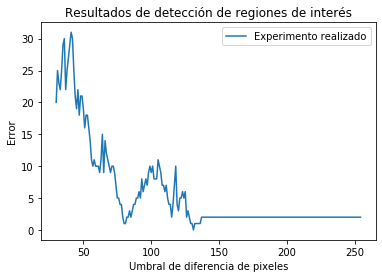

In [128]:
graficarTest(valoresExp, "Umbral de diferencia de pixeles", Errores, "Resultados de detección de regiones de interés")

A partir del valor de umbral de 150, aproximadamente, el método se vuelve muy estricto y no puede detectar ni al auto ni a la mujer. Por otro lado, valores muy bajos vuelven al método errático. En la gráfica, ubicamos a dos regiones con bajo error, una entre 70 u 80 aproximadamente, y otra entre 120 y 140. Para verificar el valor con el que se obtuvo el que se obtuvo el mejor resultado, aprovechamos una de las funciones definidas previamente:

In [136]:
print(valorOpt(valoresExp,Errores))

[131]


Según nuestra función auxiliar para determinar en qué valor de la variable se dio el menor error, '131' acierta. Sin embargo, que entre todos los valores sea el único que haya acertado podría ser un resultado específico de la imagen. Gracias a la gráfica vemos que de hecho hay una pequeña región donde el error es menor a 2, que parece concordar con los valores alrededor de 131. Por eso, decidimos manejar un umbral de 125 por defecto, asumiendo que es mejor ser más permisivo en el umbral que estricto.

El otro factor que podría afectar a estos resultados es la dimensión del kernel usado para el filtro de la mediana. Si hubiera la diferencia máxima (255) en un solo pixel de la imagen $D$, asumimos que es ruido y el filtro baja el valor de ese pixel. Sin embargo, esto también puede disfrazar a los pixeles de objetos que queremos detectar con valores por debajo del umbral. Experimentamos entonces para buscar la dimensión más apropiada para el kernel.

In [180]:
Resultados = []
valoresExp = [i for i in range(3,33,2)]
for i in valoresExp:
    auxRois = roisDeFrame(Frame_Prueba_0,Frame_Prueba_X,i,125)
    Resultados.append(len(auxRois))
Errores = calcError(2,Resultados)

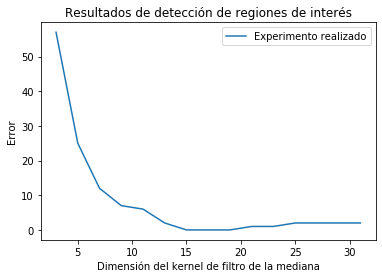

In [181]:
graficarTest(valoresExp, "Dimensión del kernel de filtro de la mediana", Errores, "Resultados de detección de regiones de interés")

In [182]:
print(valorOpt(valoresExp,Errores))

[15, 17, 19]


La dimensión del kernel debe ser impar, así que consecutivamente obtenemos buenos resultados con valores entre 15 y 19.

In [153]:
auxRois = roisDeFrame(Frame_Prueba_0,Frame_Prueba_X,15,125)
ImAux = cv2.cvtColor(Frame_Prueba_X.copy(), cv2.COLOR_GRAY2BGR)
graficarRectDeROIs(ImAux,auxRois)
cv2_imshow(ImAux)

Sin embargo, el resultado con los valores evaluados no otorga la verdadera solución: ![Resultado Estricto](Informe_Recursos/resultadoEstricto.jpg)

Entonces, recordamos el segundo valle, con mayores errores, para la variable $umbralDiferencia$. Del mismo modo, reducimos la dimensión del kernel para el filtro para disminuir los posibles cambios en los pixeles de la imagen $D$

In [171]:
f0 = np.array(Frame_Prueba_0, dtype=np.int16)
fn = np.array(Frame_Prueba_X, dtype=np.int16)
D = np.array(np.abs(f0 - fn), dtype=np.uint8)
D = cv2.medianBlur(D,9)
cv2_imshow(D)

Para entender mejor nuestros resultados, vemos la diferencia de frames, antes de ser binarizada: ![Diferencia](Informe_Recursos/Diferencia.jpg)

Gracias a esto notamos el primer problema en el planteamiento. Al asumir que el primer frame siempre estará "limpio", que un objeto en pantalla que aparezca en el primer momento se mueva, afectará a los resultados esperados. Debido a esto, ajustamos los resultados esperados a 3 regiones de interés, ya que inevitablemente el programa detectará la región donde el auto solía estar.

In [198]:
Resultados = []
valoresExp = [i for i in range(25,140)]
for i in valoresExp:
    auxRois = roisDeFrame(Frame_Prueba_0,Frame_Prueba_X,9,i)
    Resultados.append(len(auxRois))
Errores = calcError(3,Resultados)

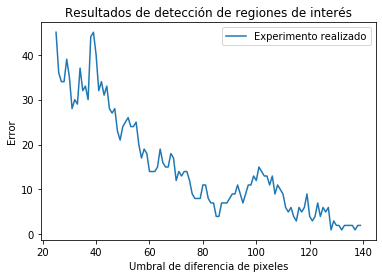

In [199]:
graficarTest(valoresExp, "Umbral de diferencia de pixeles", Errores, "Resultados de detección de regiones de interés")

El valor que varíe menos en la cantidad de regiones detectadas con el resultado no necesariamente sea el mejor. Por eso, y considerando los problemas pasados, tomamos un valor para el umbral que aunque sea laxo en comparación con el umbral anterior, podría obtener las regiones deseadas, incluso si se incluyen falsos positivos. Tomamos un valor menor a la región ascendente (después de 80). Para este experimento, utilizamos el umbral 70.

In [204]:
auxRois = roisDeFrame(Frame_Prueba_0,Frame_Prueba_X,9,70)
ImAux = cv2.cvtColor(Frame_Prueba_X.copy(), cv2.COLOR_GRAY2BGR)
graficarRectDeROIs(ImAux,auxRois)
cv2_imshow(ImAux)

El resultado con umbral y filtro más permisivos incluye varios falsos positivos, pero detecta a los objetivos: ![Diferencia](Informe_Recursos/resultadoLaxo.jpg)

Disminuir aún más el umbral podría afectar negativamente al método. Gracias a que el método incluye una validación para determinar si una región de interés en un frame $t$ es parte de un objeto detectado previamente, el resultado podría mejorar.

#### Selección de objetos

TODO

### Conclusiones (2 puntos)

<font color='green'> Redacte, al menos, **5 conclusiones relevantes** referentes a como cubrió su objetivo y que le ayudó a optimizar sus resutlados. </font>